
## LAB_07
## T Jaswanthi
## Please use the recorded voiceof yours used in last lab session. If needed, record a few more speech signals
## A1.Use HMM for classification of your speech signal using STFT features.

In [10]:
pip install hmmlearn

Note: you may need to restart the kernel to use updated packages.


In [11]:

import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [12]:
pip install numpy==1.21


  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\THADAKALURU JASWANTH\\anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [13]:
pip install librosa

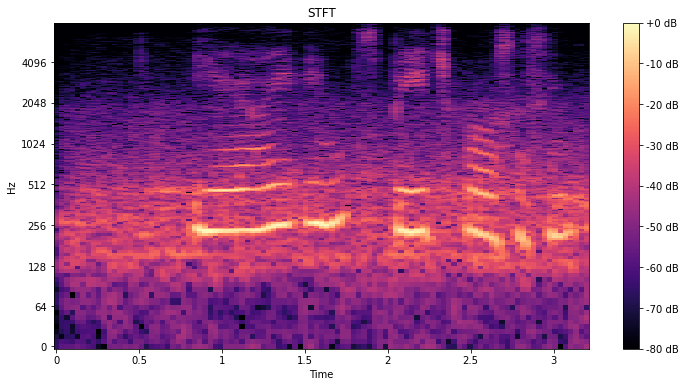

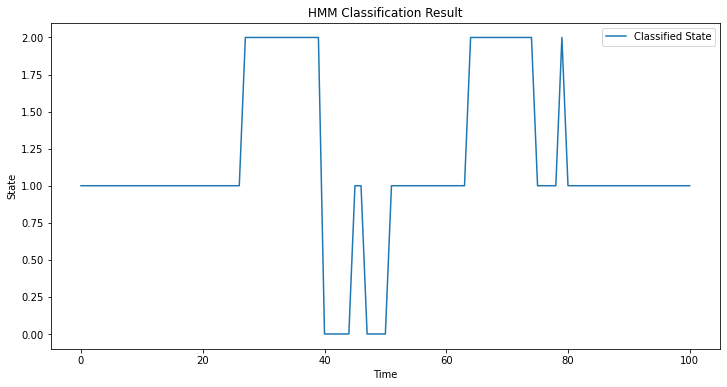

HMM Model Parameters:
Transition Matrix:
[[0.77777778 0.22222222 0.        ]
 [0.01515152 0.93939394 0.04545455]
 [0.04       0.08       0.88      ]]
Means:
[[0.16664488 0.17532856 0.16504075 ... 0.00621263 0.00742042 0.00609949]
 [0.13794146 0.1433849  0.15063134 ... 0.00408921 0.00474299 0.00475606]
 [0.26961309 0.19218664 0.18707718 ... 0.01083102 0.0092581  0.00637915]]
Covariances:
[[[0.01898199 0.         0.         ... 0.         0.         0.        ]
  [0.         0.00913083 0.         ... 0.         0.         0.        ]
  [0.         0.         0.00686692 ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.00111531 0.         0.        ]
  [0.         0.         0.         ... 0.         0.00112568 0.        ]
  [0.         0.         0.         ... 0.         0.         0.00113462]]

 [[0.010684   0.         0.         ... 0.         0.         0.        ]
  [0.         0.00783431 0.         ... 0.         0.         0.        ]
  [0.     

In [14]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

def load_audio(file_path):
    ydata, sr = librosa.load(file_path, sr=None)
    return ydata, sr

def stft_features(ydata, sr):
    stft = np.abs(librosa.stft(ydata))
    return stft

def train_hmm(features, n_components=3, n_iter=100):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=n_iter)
    model.fit(features)
    return model

def plot_stft(stft, sr):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT')
    plt.show()

def classify_signal(model, features):
    # Predict using the trained HMM model
    labels = model.predict(features.T)  # Transpose features to fit HMM's requirement
    return labels

def main():
    audio_file_path =r"C:\Users\THADAKALURU JASWANTH\Downloads\Sem 6 LAB\AISpeechProcessing\AIvoice_lab1.opus"
    
    # Load audio
    y, sr = load_audio(audio_file_path)
    
    # Extract STFT features
    stft = stft_features(y, sr)
    
    # Plot STFT
    plot_stft(stft, sr)
    
    # Train HMM
    model = train_hmm(stft.T)  # Transpose stft to fit HMM's requirement
    
    # Classify signal using trained HMM
    labels = classify_signal(model, stft)
    
    # Plot the classification result
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(labels)), labels, label='Classified State')
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.title('HMM Classification Result')
    plt.legend()
    plt.show()

    # Print trained model parameters
    print("HMM Model Parameters:")
    print("Transition Matrix:")
    print(model.transmat_)
    print("Means:")
    print(model.means_)
    print("Covariances:")
    print(model.covars_)
    
if __name__ == "__main__":
    main()
